<a href="https://colab.research.google.com/github/devbravo/Loand-Data-Analysis/blob/main/Loan_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from sklearn.utils import resample


In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML Projects/Loan Data Analysis/Data/loan_data.csv')
display(df.head(), df.shape)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


(9578, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.isna().sum().sum()

0

In [7]:
# checking target var
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

The target value is imbalanced

In [8]:
class_counts = df['not.fully.paid'].value_counts()

majority_class = class_counts.idxmax()

df_resampled = pd.concat([
    df[df['not.fully.paid'] == majority_class],
    df[df['not.fully.paid'] != majority_class].sample(n=class_counts[majority_class], replace=True)
])

df_resampled['not.fully.paid'].value_counts()


0    8045
1    8045
Name: not.fully.paid, dtype: int64

**Split the data into numerical and categorical data**

In [9]:
# numerical
num_data = df_resampled[["int.rate", "installment", "log.annual.inc", "dti", "fico", "days.with.cr.line", "revol.bal",
               "revol.util", "not.fully.paid"]]
num_data.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,not.fully.paid
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0


In [10]:
# categorical
cat_data = df_resampled[["credit.policy", "purpose", "inq.last.6mths", "delinq.2yrs", "pub.rec", "not.fully.paid"]]
cat_data

,credit.policy,purpose,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0,0,0,0
1,1,credit_card,0,0,0,0
2,1,debt_consolidation,1,0,0,0
3,1,debt_consolidation,1,0,0,0
4,1,credit_card,0,1,0,0
...,...,...,...,...,...,...
4071,1,all_other,2,0,0,1
9048,0,educational,6,0,0,1
3507,1,credit_card,1,0,0,1
1004,1,debt_consolidation,0,0,0,1


In [11]:
num_data.describe()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,not.fully.paid
count,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,1.609000e+04,16090.000000,16090.000000
mean,0.126986,329.771075,10.917938,12.770758,705.165631,4497.327323,1.910693e+04,49.083688,0.500000
std,0.026673,216.197175,0.638743,6.945484,36.711870,2488.384238,4.555401e+04,29.249466,0.500016
min,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000
25%,0.110300,165.875000,10.518673,7.340000,677.000000,2789.958333,3.221500e+03,25.000000,0.000000
50%,0.127300,274.450000,10.915088,12.845000,702.000000,4109.958333,8.686500e+03,49.600000,0.500000
75%,0.144200,469.122500,11.289782,18.220000,727.000000,5669.958333,1.925700e+04,73.700000,1.000000
max,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,1.000000


**Observations**



1.   Installment, days.with.cr.line, revol.bal, fico, revol.util have high standard deviation and probably contain outliers
2.   highest day with credit line is 17640 days



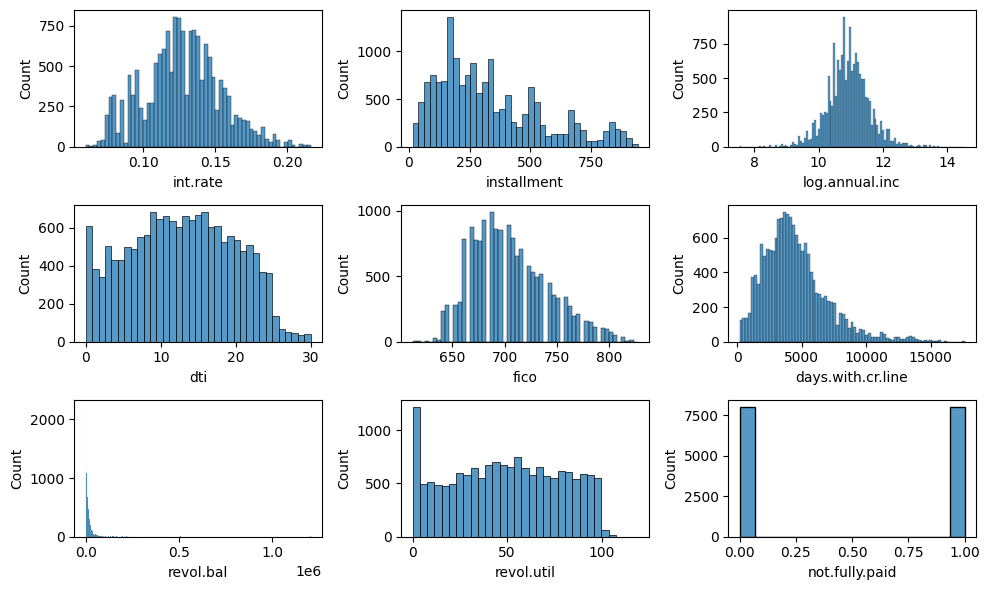

In [12]:
# plotting numerical data distribution
fig, axes = plt.subplots(3, 3, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(num_data.columns):
  sns.histplot(num_data[col], ax=axes[i])
  plt.tight_layout()
plt.show()

**Observations:**

Data for installment, days.with.cr.line, revo.bal, fico and revol.uitil is positively skewed and may contain outliers

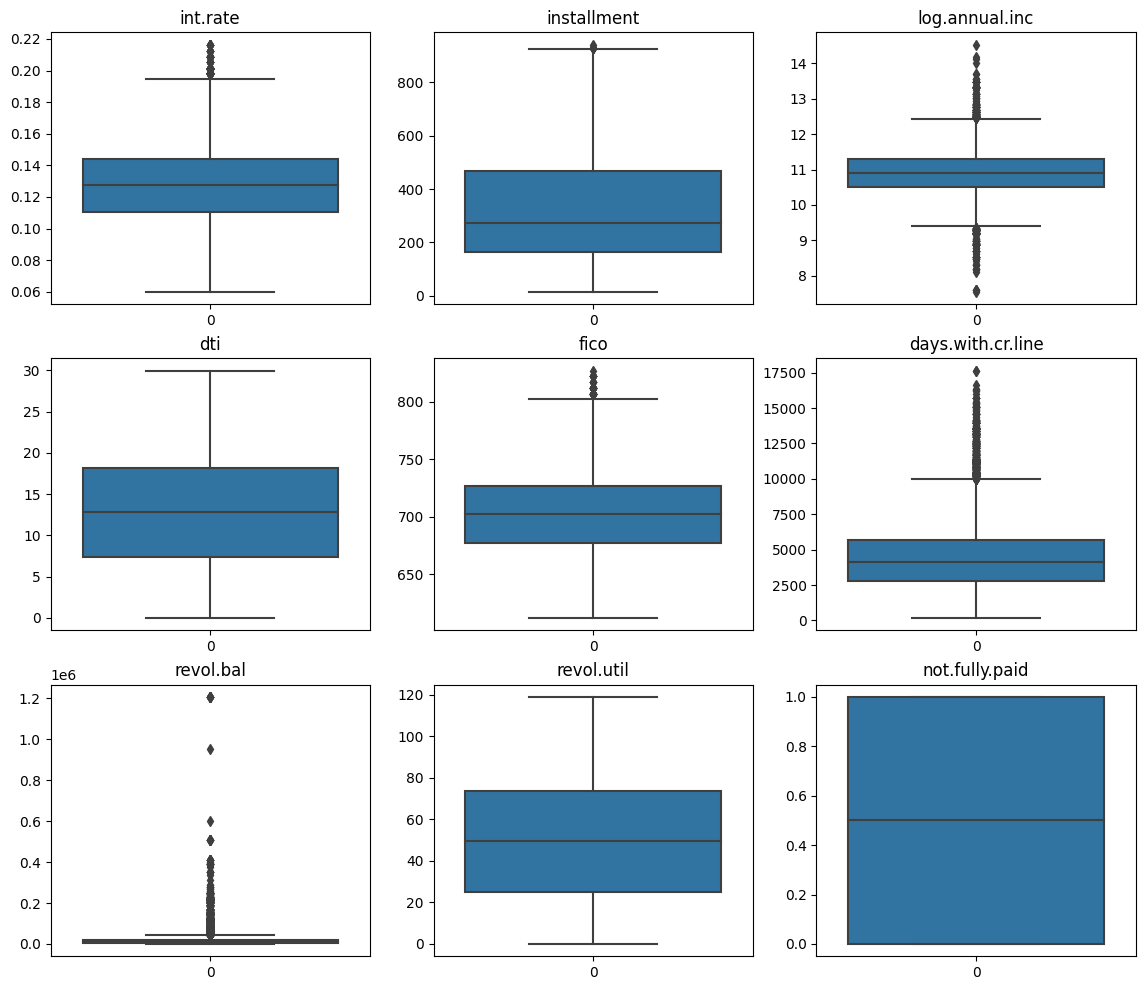

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(num_data.columns):
  sns.boxplot(data=num_data[col], ax=axes[i])
  axes[i].set_title(col)

plt.show()

In [14]:
df_resampled = df_resampled.copy()

le = LabelEncoder()
df_resampled['purpose'] = le.fit_transform(df_resampled['purpose'].astype(str))
df_resampled.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**Observations:**

From the graph we can see that outliers do exist in numerical data

In [15]:
def detect_outlier(feature):
    data = df_resampled[feature]
    mean = np.mean(data)
    std = np.std(data)
    threshold = 3 * std

    outliers = data[np.abs(data - mean) > threshold]

    print(f"\nOutlier caps for {feature}")
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                           len(data[data > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + threshold, len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len(data[data > data.quantile(.99)])))


In [16]:
for feat in num_data:
    detect_outlier(feat)


Outlier caps for int.rate
  --95p: 0.2 / 795 values exceed that
  --3sd: 0.2 / 34 values exceed that
  --99p: 0.2 / 158 values exceed that

Outlier caps for installment
  --95p: 809.8 / 796 values exceed that
  --3sd: 978.3 / 0 values exceed that
  --99p: 880.8 / 156 values exceed that

Outlier caps for log.annual.inc
  --95p: 12.0 / 805 values exceed that
  --3sd: 12.8 / 142 values exceed that
  --99p: 12.6 / 159 values exceed that

Outlier caps for dti
  --95p: 23.9 / 791 values exceed that
  --3sd: 33.6 / 0 values exceed that
  --99p: 26.8 / 161 values exceed that

Outlier caps for fico
  --95p: 772.0 / 798 values exceed that
  --3sd: 815.3 / 18 values exceed that
  --99p: 802.0 / 105 values exceed that

Outlier caps for days.with.cr.line
  --95p: 9120.0 / 798 values exceed that
  --3sd: 11962.2 / 258 values exceed that
  --99p: 13114.2 / 161 values exceed that

Outlier caps for revol.bal
  --95p: 64403.3 / 805 values exceed that
  --3sd: 155764.7 / 258 values exceed that
  --99p: 

In [17]:
# Capping features in df_resampled to remover outliers in numerical features

# Upper bounded outliers
for var in ['int.rate' ,'installment', 'log.annual.inc', 'fico', 'days.with.cr.line', 'revol.bal', 'not.fully.paid']:
    df_resampled[var].clip(upper=df_resampled[var].quantile(.95), inplace=True)

# Lower and Upper bounded outliers
for var in ['log.annual.inc']:
    df_resampled[var].clip(lower = df_resampled[var].quantile(.05), upper = df_resampled[var].quantile(0.95), inplace=True)

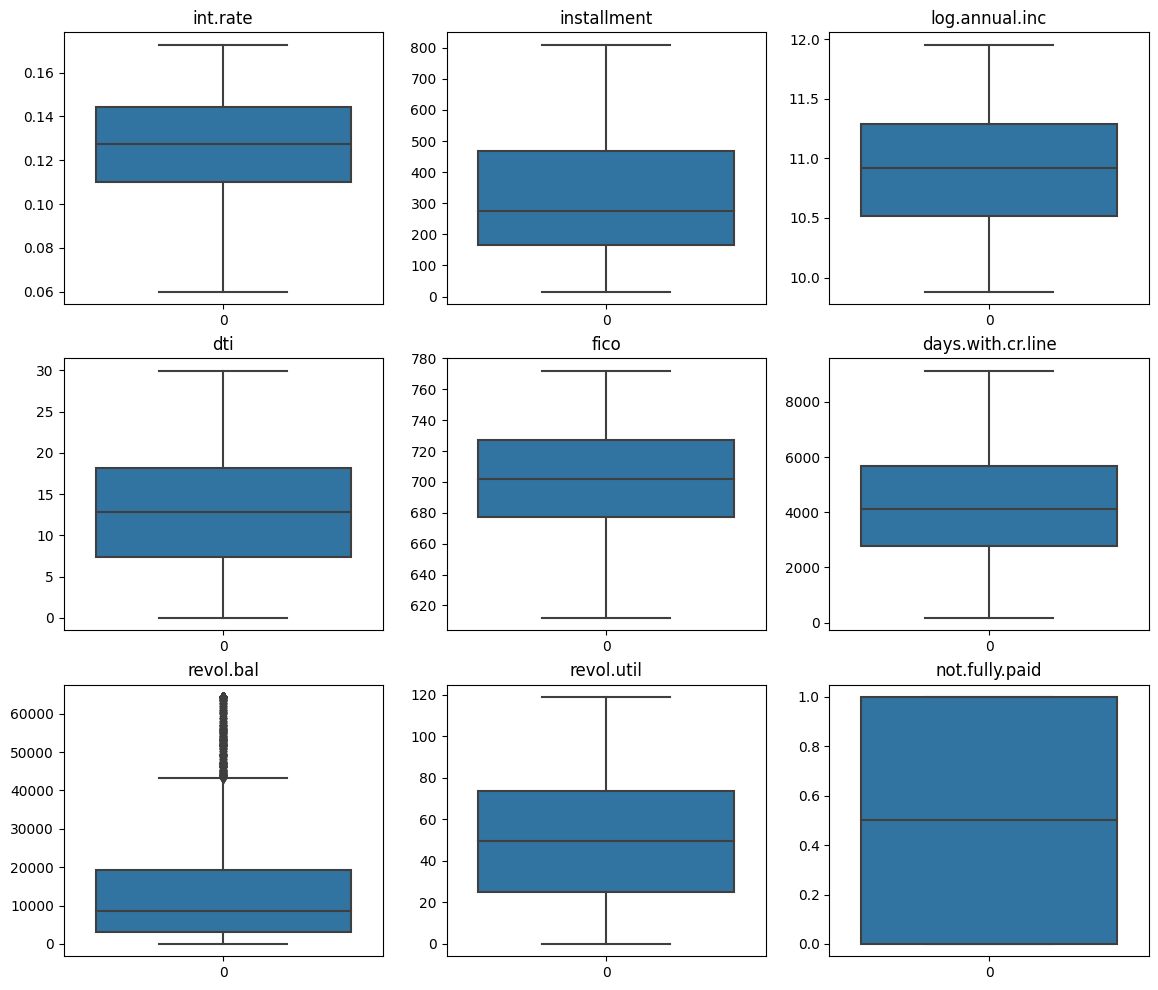

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(num_data.columns):
  sns.boxplot(data=df_resampled[col], ax=axes[i])
  axes[i].set_title(col)

plt.show()

**Observation:**

Most outliers are removed except for revol.bal because it has a really high standard dev

In [19]:
def show_skewness(type, df):
  for num in type.columns:
    num_skewed = df[num].skew()
    print('{}: {}'.format(num, num_skewed))

In [20]:
show_skewness(num_data, df_resampled)

int.rate: -0.11634765247736019
installment: 0.7965787086283584
log.annual.inc: 0.006019270183165731
dti: 0.011756493793241594
fico: 0.34030513870154977
days.with.cr.line: 0.48461749129221904
revol.bal: 1.7021201499424163
revol.util: -0.03631016793956663
not.fully.paid: 0.0


In [21]:
df_skew_corrected = df_resampled.copy()
def log_trans(df):
  for num in df:
    num_skewed = df_resampled[num].skew()
    if abs(num_skewed) > 0.3:
        df_skew_corrected[num] = np.log1p(df_resampled[num])
  return df_skew_corrected

In [22]:
df_corrected = log_trans(num_data)

In [23]:
show_skewness(num_data, df_corrected)

int.rate: -0.11634765247736019
installment: -0.5561634626003273
log.annual.inc: 0.006019270183165731
dti: 0.011756493793241594
fico: 0.2558765381946018
days.with.cr.line: -1.1346764569762102
revol.bal: -2.2989021894138366
revol.util: -0.03631016793956663
not.fully.paid: 0.0


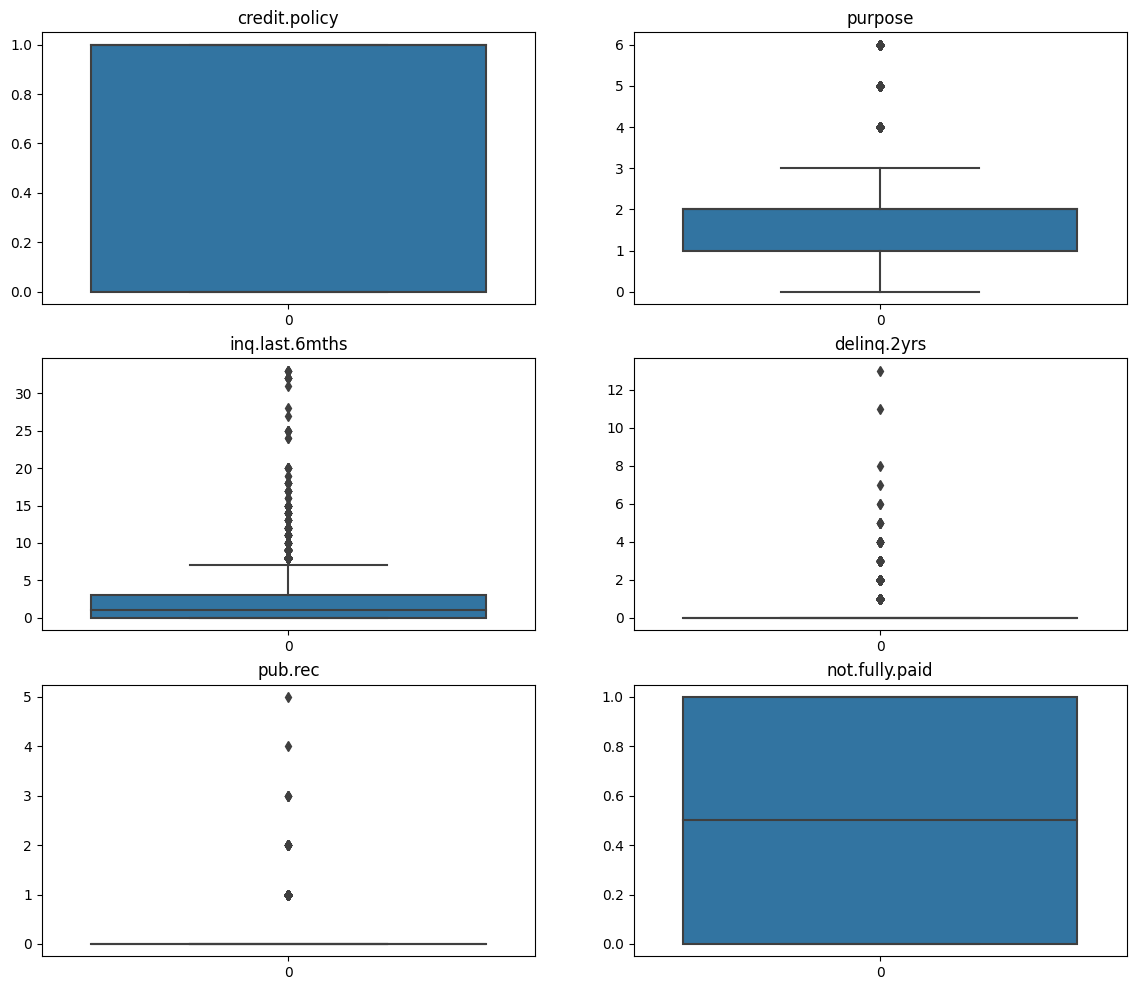

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(cat_data.columns):
  sns.boxplot(data=df_resampled[col], ax=axes[i])
  axes[i].set_title(col)

plt.show()

In [25]:
for feat in cat_data:
    detect_outlier(feat)


Outlier caps for credit.policy
  --95p: 1.0 / 0 values exceed that
  --3sd: 2.1 / 0 values exceed that
  --99p: 1.0 / 0 values exceed that

Outlier caps for purpose
  --95p: 6.0 / 0 values exceed that
  --3sd: 7.3 / 0 values exceed that
  --99p: 6.0 / 0 values exceed that

Outlier caps for inq.last.6mths
  --95p: 7.0 / 578 values exceed that
  --3sd: 9.7 / 243 values exceed that
  --99p: 12.0 / 122 values exceed that

Outlier caps for delinq.2yrs
  --95p: 1.0 / 499 values exceed that
  --3sd: 1.8 / 499 values exceed that
  --99p: 3.0 / 43 values exceed that

Outlier caps for pub.rec
  --95p: 1.0 / 33 values exceed that
  --3sd: 0.9 / 1176 values exceed that
  --99p: 1.0 / 33 values exceed that

Outlier caps for not.fully.paid
  --95p: 1.0 / 0 values exceed that
  --3sd: 2.0 / 0 values exceed that
  --99p: 1.0 / 0 values exceed that


In [26]:
for cat in ['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs']:
    df_resampled[cat].clip(upper=df_resampled[cat].quantile(.95), inplace=True)

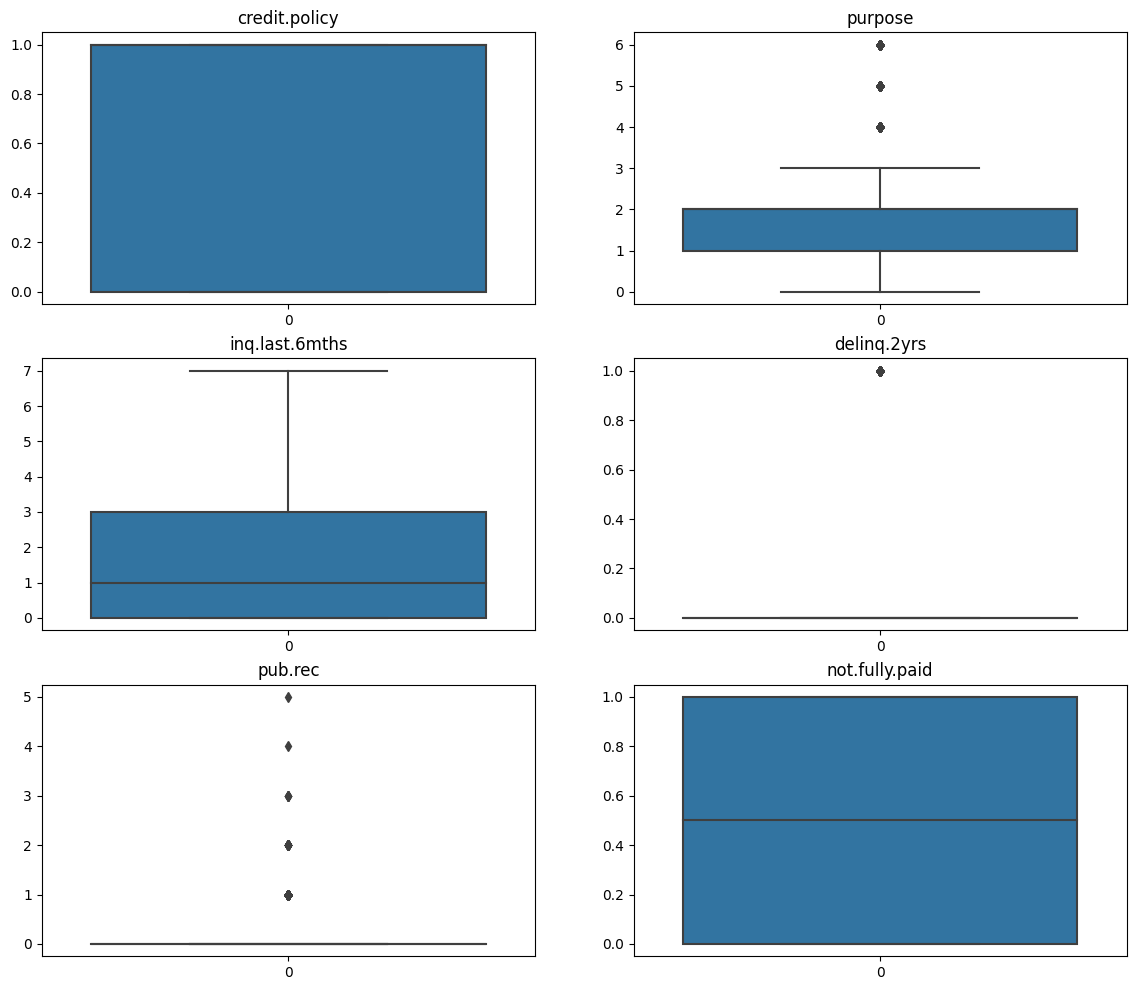

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(cat_data.columns):
  sns.boxplot(data=df_resampled[col], ax=axes[i])
  axes[i].set_title(col)

plt.show()

In [28]:
show_skewness(cat_data, df_resampled)

credit.policy: -1.1340861722541924
purpose: 0.8648616261461158
inq.last.6mths: 1.23798108558694
delinq.2yrs: 2.2951188990526803
pub.rec: 4.023619936683796
not.fully.paid: 0.0


In [29]:
df_corrected = log_trans(cat_data)

In [30]:
show_skewness(cat_data, df_corrected)

credit.policy: -1.1340861722541922
purpose: -0.22306240472614206
inq.last.6mths: 0.2751793430785444
delinq.2yrs: 2.295118899052681
pub.rec: 3.4185054859877235
not.fully.paid: 0.0


In [31]:
df_corrected.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0.693147,1.098612,0.1189,6.697997,11.350407,19.48,6.603944,8.637809,10.270039,52.1,0.000000,0.000000,0.0,0
1,0.693147,0.693147,0.1071,5.434682,11.082143,14.29,6.562444,7.923348,10.422995,76.7,0.000000,0.000000,0.0,0
2,0.693147,1.098612,0.1357,5.907702,10.373491,11.63,6.526495,8.457655,8.163941,25.6,0.693147,0.000000,0.0,0
3,0.693147,1.098612,0.1008,5.095834,11.350407,8.10,6.569481,7.901362,10.424303,73.2,0.693147,0.000000,0.0,0
4,0.693147,0.693147,0.1426,4.643621,11.299732,14.97,6.504288,8.310661,8.464003,39.5,0.000000,0.693147,0.0,0


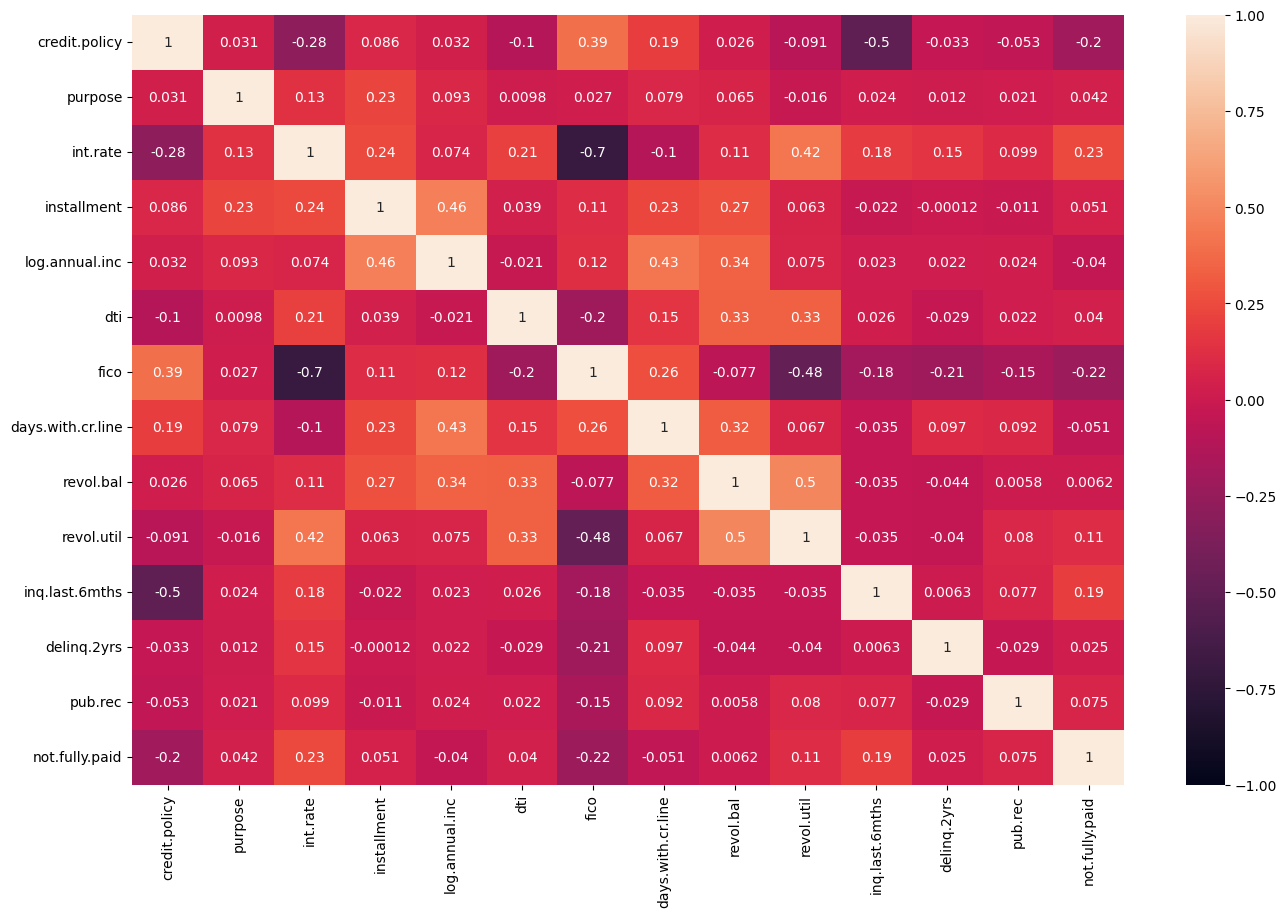

In [32]:
df_corr = df_corrected.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)
plt.show()

**Observations:**

We will remove the variable fico, because it has high multicollinearity with int_rate and revol_util. We will also remove inq_last_6mths because it has high multicollinearity with cread_policy

In [33]:
df_corrected.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0.693147,1.098612,0.1189,6.697997,11.350407,19.48,6.603944,8.637809,10.270039,52.1,0.000000,0.000000,0.0,0
1,0.693147,0.693147,0.1071,5.434682,11.082143,14.29,6.562444,7.923348,10.422995,76.7,0.000000,0.000000,0.0,0
2,0.693147,1.098612,0.1357,5.907702,10.373491,11.63,6.526495,8.457655,8.163941,25.6,0.693147,0.000000,0.0,0
3,0.693147,1.098612,0.1008,5.095834,11.350407,8.10,6.569481,7.901362,10.424303,73.2,0.693147,0.000000,0.0,0
4,0.693147,0.693147,0.1426,4.643621,11.299732,14.97,6.504288,8.310661,8.464003,39.5,0.000000,0.693147,0.0,0


In [34]:
features = df_corrected.iloc[:,:-1].values
label = df_corrected.iloc[:,-1].values

In [35]:
# 1. Initialize the model algorithm
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()

# 2. Apply RFE to model (ALL FEATURES AND LABEL)
from sklearn.feature_selection import RFE
selectFeaturesFromRFE = RFE(estimator=modelLR,
                           step=1) #Suggested Step by Prashant Nair

# Fit the data with RFE
selectFeaturesFromRFE.fit(features,label)

# 3. Get Features with High Ranking (1,2,3,4,...) (Get features that has Rank 1. Sometimes Rank 2 is considered)
# credit.policy, int.rate, installment, log.annual.inc, fico, inq.last.6mths, pub.rec
print(selectFeaturesFromRFE.ranking_)

[1 4 1 2 1 6 1 5 7 8 1 3 1]


**Observation:**

Using Correlation matrix and RFE we will select
'int.rate, installment, log.annual.inc. inq.last.6mnths and pub.rec, we will drop fico and credit.policy sice they have multicollinearity

In [36]:
df_final = df_corrected[['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'inq.last.6mths', 'pub.rec', 'not.fully.paid']]
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,inq.last.6mths,pub.rec,not.fully.paid
0,0.693147,0.1189,6.697997,11.350407,19.48,6.603944,0.000000,0.0,0
1,0.693147,0.1071,5.434682,11.082143,14.29,6.562444,0.000000,0.0,0
2,0.693147,0.1357,5.907702,10.373491,11.63,6.526495,0.693147,0.0,0
3,0.693147,0.1008,5.095834,11.350407,8.10,6.569481,0.693147,0.0,0
4,0.693147,0.1426,4.643621,11.299732,14.97,6.504288,0.000000,0.0,0


**Data transformation**

In [37]:
features = df_final.iloc[:,:-1].values
label = df_final.iloc[:,-1].values

rs = RobustScaler()

features = rs.fit_transform(features)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [39]:
model = tf.keras.Sequential([
     tf.keras.layers.InputLayer(input_shape=(8, )),

     tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.10),

     tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.10),

     tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.10),

     tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_uniform'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.10),

     tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_uniform'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.10),

     tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_uniform'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.10),

     tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_uniform'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.10),

     tf.keras.layers.Dropout(0.30),
     tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L1(0.001))
])

model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer , loss="binary_crossentropy" , metrics=["accuracy"])

class MyThresholdCallback(tf.keras.callbacks.Callback):
  def __init__(self, cl):
    super(MyThresholdCallback, self).__init__()
    self.cl = cl

  def on_epoch_end(self, epoch, logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']

    # if testScore > trainScore and testScore > self.cl:
    #   self.model.stop_training = True

    if testScore == self.cl:
      self.model.stop_training = True


early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

monitor = MyThresholdCallback(cl=0.90)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=1000,
          batch_size=256,
          callbacks=[monitor, early_stopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [40]:
history = model.history

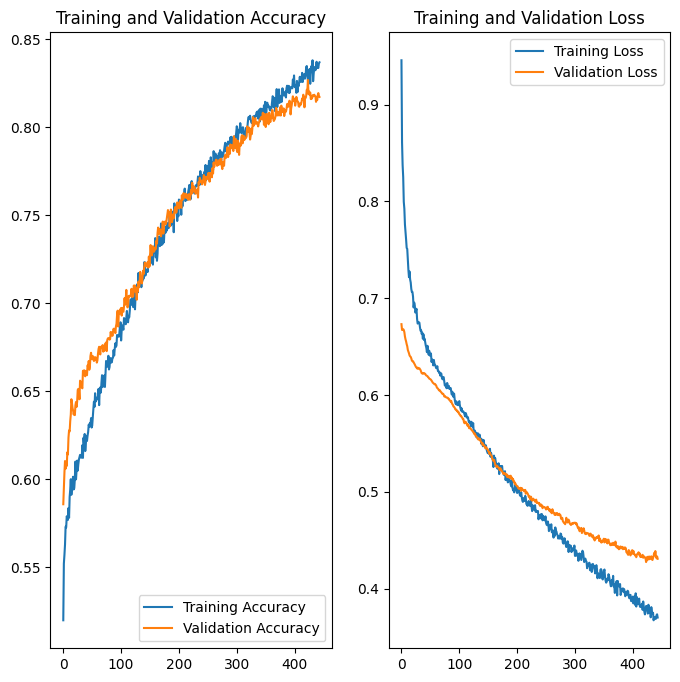

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1 )
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2 )
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

101/101 [==============================] - 0s 5ms/step - loss: 0.4274 - accuracy: 0.8269


[0.42735227942466736, 0.8269111514091492]

In [44]:
model.predict(features)

503/503 [==============================] - 2s 2ms/step


array([[0.03062415],
       [0.06701376],
       [0.6733597 ],
       ...,
       [0.810858  ],
       [0.6711859 ],
       [0.82429314]], dtype=float32)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label, (model.predict(features) > 0.5).astype("int32"))

503/503 [==============================] - 1s 3ms/step


array([[6688, 1357],
       [ 248, 7797]])

In [46]:
from sklearn.metrics import classification_report
print(classification_report(label, (model.predict(features) > 0.5).astype("int32")))

503/503 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      8045
           1       0.85      0.97      0.91      8045

    accuracy                           0.90     16090
   macro avg       0.91      0.90      0.90     16090
weighted avg       0.91      0.90      0.90     16090

